In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from thesis_toolbox.plot.tools import add_letter
import numpy as np
from thesis_toolbox.composites.create_composites import detrend_timeseries,select_years_to_composite
from thesis_toolbox.composites.setup_thesis_data import mslp_wind_composite
from thesis_toolbox.plot.plot_composites import plot_mslp_850hpa_composite, plot_which_years_composited
from thesis_toolbox.utils import get_locations_CLP,read_receptor_composite
import glob
import matplotlib as mpl
%matplotlib inline

In [2]:
if 'snakemake' in globals():
    to_file = True
    path='./'
    oro=snakemake.input.oro
    kind = snakemake.wildcards.kind
else:
    path = '../../../'
    to_file= False
    oro = '../../../downloads/ERA5_orography.nc'
    kind='total_deposition'

In [3]:
def plot_composite(composite,axes, locs, scale=0.5, u=2,oro=oro, add_label=False):
    for ax ,loc_name in zip(axes.ravel(),locs.index):
        ax.tick_params(axis="y", which='both',right=True, left=True, labelleft=False, labelright=False)
        ax.tick_params(axis="x", which='both',bottom=True, top=False, labelbottom=False)
        plot_mslp_850hpa_composite(composite, ax=ax,  x_qk=0.81, y_qk=1.12, receptor_loc=locs.loc[loc_name,:].to_list(), 
                               receptor_name=loc_name
                          , vector_scale=scale,angles='uv', colorbar=False, U=u, oro=oro, hatches='xxx', hatch_color='dimgrey',
                                  xticks=[20,60,100,140,180],receptor_color=locs.loc[loc_name,'color'])
        if add_label:
            ax.set_ylabel(loc_name)



In [4]:
locs_df = get_locations_CLP()
locs =['SHAPOTOU','SACOL','BAODE','LUOCHUAN','LINGTAI','LANTIAN']


DJF_20mu_composite = read_receptor_composite(locs, 
                                             path, 'msl_pressure_wind_850hPa', '20micron','DJF', std='4_rank', kind=kind)
MAM_20mu_composite = read_receptor_composite(locs, path, 'msl_pressure_wind_850hPa', '20micron','MAM', std='4_rank', kind=kind)

DJF_2mu_composite = read_receptor_composite(locs, path, 'msl_pressure_wind_850hPa', '2micron','DJF', std='4_rank', kind=kind)

MAM_2mu_composite = read_receptor_composite(locs,path, 'msl_pressure_wind_850hPa', '2micron','MAM', std='4_rank', kind=kind)


In [5]:
locs_df = locs_df.drop(['BADOE', 'ULANTATAL', 'YINCHUAN'])

In [6]:
locs_df = locs_df.reindex(['SHAPOTOU', 'SACOL','BAODE','LUOCHUAN', 'LINGTAI', 'LANTIAN'])

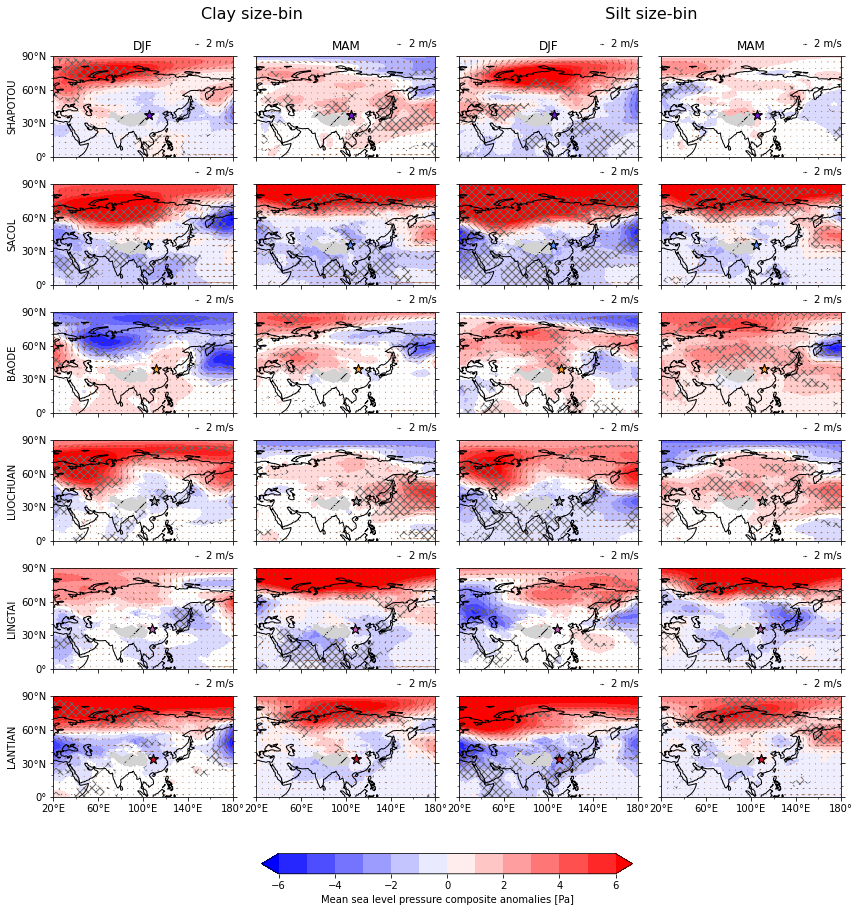

In [7]:
fig,ax = plt.subplots(nrows=6, ncols=4,  figsize=(8.3*1.7, 11.7*1.2), subplot_kw={'projection':ccrs.PlateCarree()})


fig.suptitle('Clay size-bin                                                           Silt size-bin',x=0.515, y=0.91,
             ha='center', va='center', fontsize=16)


plot_composite(DJF_2mu_composite, ax[:,0], locs_df, add_label=True)
plot_composite(MAM_2mu_composite,ax[:,1], locs_df)
plot_composite(DJF_20mu_composite,ax[:,2], locs_df)
plot_composite(MAM_20mu_composite,ax[:,-1], locs_df)
for axi,l in zip(ax[:,0].ravel(),locs_df.index):
    axi.tick_params(axis="y", which='both',right=True, left=True, labelleft=True, labelright=False)    

for axi in ax[-1,:].ravel():
#     axi.set_xticks([20, 60, 100, 140, 180])
#     axi.xaxis.set_ticklabels(['20°E', '60°E', '100°E', '140°E','180°E'])
    axi.tick_params(axis="x", which='both',bottom=True, top=False, labelbottom=True)
ax[0,0].set_title('DJF')
ax[0,1].set_title('MAM')
ax[0,2].set_title('DJF')
ax[0,3].set_title('MAM')
fig.subplots_adjust(hspace=0.04, wspace=0.13)
cax = fig.add_axes([0.33,0.06,0.365, 0.02])
cmap = mpl.cm.bwr
# add_letter(ax.T, y=1.1, fontsize=10)
fig.colorbar(mpl.cm.ScalarMappable(mpl.colors.BoundaryNorm(np.arange(-6,7,1),cmap.N, extend='both'), 
                                          cmap=cmap),cax=cax, extend='both', orientation='horizontal', 
            label='Mean sea level pressure composite anomalies [Pa]')

if to_file:
    plt.savefig(snakemake.output.composite_facet_plot, bbox_inches='tight', dpi=300)